In [1]:
import seaborn as sns
import numpy as np
import pandas as pd 
import ctgan
from scipy.stats import normaltest
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import math
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import xgboost as xgb
import pickle
from scipy.stats import shapiro
from sdv.tabular import CTGAN
from sklearn.metrics import make_scorer, mean_squared_error
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score
from lazypredict.Supervised import LazyClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from tensorflow import keras
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import r2_score
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import accuracy_score, confusion_matrix, mean_squared_error
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score,\
f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier


In [2]:
# Veri okuma 
df = pd.read_excel("new_data.xlsx")

In [3]:
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [4]:
#Verinin dtype bilgisini inceliyoruz.
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB
None


In [5]:
#10 değişken 14999 gözlem birimi var
df.shape

(14999, 10)

In [91]:
#Değişkenlerin veri türlerine göre uygun veri dönüşümleri yapıyoruz.
df["left"] = df["left"].astype("object")
df["promotion_last_5years"] = df["promotion_last_5years"].astype("object")
df["Work_accident"] = df["Work_accident"].astype("object")



In [92]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  object 
 6   left                   14999 non-null  object 
 7   promotion_last_5years  14999 non-null  object 
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(3), object(5)
memory usage: 1.1+ MB
None


In [93]:
# Kayıp değer analizi

df.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

In [94]:
# Nümerik değişkenleri num_deg adı altında topladım.
num_deg = df.select_dtypes(include=['float64', 'int64']).copy()

In [95]:
#Nümerik değişkenlerin özet istatistikleri
num_deg.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company
count,14999.00,14999.00,14999.00,14999.00,14999.00
mean,0.61,0.72,3.80,201.05,3.50
std,0.25,0.17,1.23,49.94,1.46
min,0.09,0.36,2.00,96.00,2.00
25%,0.44,0.56,3.00,156.00,3.00
50%,0.64,0.72,4.00,200.00,3.00
75%,0.82,0.87,5.00,245.00,4.00
max,1.00,1.00,7.00,310.00,10.00


<AxesSubplot:>

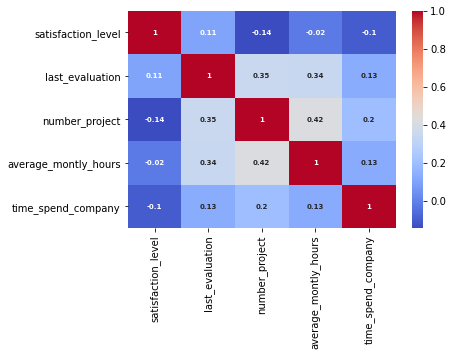

In [96]:
# Nümerik Değişkenler arası ilişkiyi inceler
corr_matrix = num_deg.corr()
sns.heatmap(num_deg.corr(), annot=True, cmap='coolwarm', annot_kws={"fontsize":7, "fontweight":"bold"})

<AxesSubplot:title={'center':'İşten Ayrılanların Maaş Grafiği'}, xlabel='salary'>

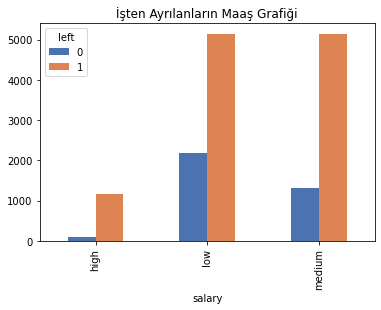

In [97]:
#İşten çıkanların maaş bilgisine göre grafiği
pd.crosstab(df.salary,df.left).plot(kind='bar',title="İşten Ayrılanların Maaş Grafiği")


<AxesSubplot:title={'center':'Departmanların İşten Ayrılma Grafiği'}, xlabel='Department'>

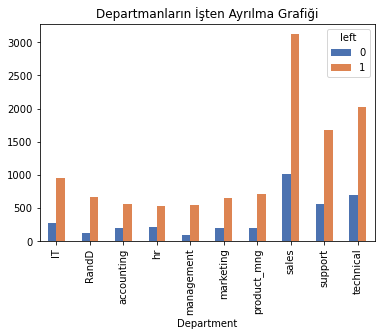

In [98]:
#İşten çıkanların departman bilgisine göre grafiği
pd.crosstab(df.Department,df.left).plot(kind='bar',title="Departmanların İşten Ayrılma Grafiği")


<AxesSubplot:title={'center':'Son 5 Yılda Terfi Alınımına Göre İşten Ayrılma Grafiği'}, xlabel='promotion_last_5years'>

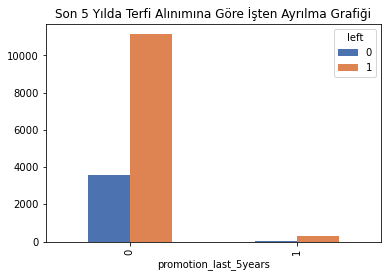

In [99]:
pd.crosstab(df.promotion_last_5years,df.left).plot(kind='bar',title="Son 5 Yılda Terfi Alınımına Göre İşten Ayrılma Grafiği")

In [100]:
#İşten çıkanların numerik değişkenlere göre ortalama değerleri.
df.groupby('left').mean()


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company
left,,,,,
0,0.44,0.72,3.86,207.42,3.88
1,0.67,0.72,3.79,199.06,3.38


In [101]:
#Sunumda olmayacak durum. Teknik bazı dönüşümler yapıldı
data2 = df[['satisfaction_level', 'average_montly_hours', 'promotion_last_5years', 'salary', 'left']]

In [102]:
#Sunumda olmayacak durum. Teknik bazı dönüşümler yapıldı
dummies = pd.get_dummies(data2['salary'])

In [103]:
#Sunumda olmayacak durum. Teknik bazı dönüşümler yapıldı. Şu denebilir kategorik değişkenler one hot encoding tekniği uygulandı.
data3 = pd.concat([data2.drop(columns='salary'), dummies], axis='columns')
data3['left'], labels = pd.factorize(data3['left'])
data3['promotion_last_5years'], labels = pd.factorize(data3['promotion_last_5years'])


In [104]:
print(data3.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   average_montly_hours   14999 non-null  int64  
 2   promotion_last_5years  14999 non-null  int64  
 3   left                   14999 non-null  int64  
 4   high                   14999 non-null  uint8  
 5   low                    14999 non-null  uint8  
 6   medium                 14999 non-null  uint8  
dtypes: float64(1), int64(3), uint8(3)
memory usage: 512.8 KB
None


In [105]:
X = data3.drop(columns='left')


In [106]:
y = data3['left']


In [107]:
from sklearn.model_selection import train_test_split

In [108]:
#Veriyi train-test olarak ayırdık
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [109]:
len(X_train), len(X_test)

(11999, 3000)

In [110]:
#Burda kurduğumuz modelin değerlendirilmesi yönelik bir fonksiyon. Bu fonksiyon sayesinde accuracy,f1 vb değerleri görebilicez

def compute(ytest, ypred):  # Copied

    cm = confusion_matrix(ytest, ypred)
    class_label = ["true", "false"]
    class_label_2 = ["positive", "negetive"]
    df_cm = pd.DataFrame(cm, index=class_label, columns=class_label_2)
    sns.heatmap(df_cm, annot=True, cmap='coolwarm', linewidths=2, fmt='d')
    plt.title("Confusion Matrix", fontsize=15)
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()

    # Calculate Metrics
    acc = accuracy_score(ytest, ypred)
    mse = mean_squared_error(ytest, ypred)
    precision, recall, fscore, train_support = score(ytest, ypred, pos_label=1, average='binary')
    print('Precision: {} \nRecall: {} \nF1-Score: {} \nAccuracy: {} %\nMean Square Error: {}'.format(
        round(precision, 3), round(recall, 3), round(fscore, 3), round((acc * 100), 3), round((mse), 3)))

## LOJİSTİK REGRESYON ##

In [111]:
from sklearn.metrics import classification_report

In [112]:
from sklearn.linear_model import LogisticRegression

In [113]:
#LOJİSTİK REGRESYON modelini varsayılan standart parametreler ile kuruyoruz.
loj_reg = LogisticRegression()


In [114]:
loj_reg.fit(X_train, y_train) 


LogisticRegression()

In [115]:
loj_reg.score(X_train, y_train) # Lojistik reg. accuracy skoru %77 çıkıyor.

0.7801483456954746

In [116]:
y_pred_loj = loj_reg.predict(X_test)

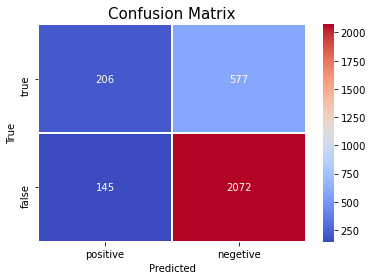

Precision: 0.782 
Recall: 0.935 
F1-Score: 0.852 
Accuracy: 75.933 %
Mean Square Error: 0.241
None


In [117]:
#LOJİSTİK REGRESYON BAŞARI METRİĞİ
classify_eval = compute(y_test, loj_reg.predict(X_test))
print(classify_eval)

# Confusion matris ile yaptığımız tahminlerin ne kadarı doğru ne kadarı yanlış bunu görebiliyoruz.
# Aşağısında ise Model değerlendirme metrikleri yer alıyor. 

In [118]:
# Farklı bir değerlendirme metriği olan ROC eğrisini çizdiriyorum.
log_reg_optim_2 = LogisticRegression(random_state=1337, max_iter=500).fit(X_train, y_train)
y_pred_proba = log_reg_optim_2.predict_proba(X_test)[:, 1]  # Predicted probabilities for the positive class

roc_auc_log = roc_auc_score(y_test, y_pred_proba)
print("ROC-AUC Score:", roc_auc_log)

ROC-AUC Score: 0.7421797546072351


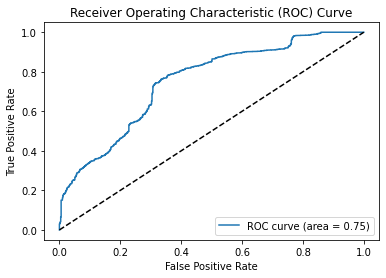

In [72]:
from sklearn.metrics import roc_curve, auc

# Calculate predicted probabilities for the positive class
y_pred_proba = log_reg_optim_2.predict_proba(X_test)[:, 1]

# Calculate the false positive rate (fpr), true positive rate (tpr), and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Calculate the area under the ROC curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line representing random guessing
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

## KNN ALGORİTMASI ##

In [119]:
from sklearn.neighbors import KNeighborsClassifier

In [120]:
#KNN  modeli kurulur 
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
knn.score(X_train, y_train)

0.9506625552129344

In [126]:
y_pred_knn = knn.predict(X_test)

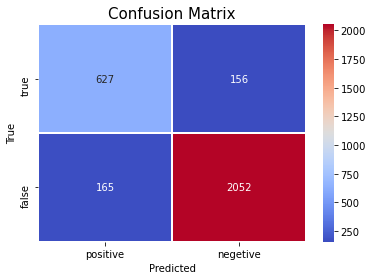

Precision: 0.929 
Recall: 0.926 
F1-Score: 0.927 
Accuracy: 89.3 %
Mean Square Error: 0.107
None


In [127]:
#KNN BAŞARI METRİĞİ  yukarıdaki aynı tablo 
classify_eval = compute(y_test, knn.predict(X_test))
print(classify_eval)

ROC-AUC Score: 0.5175318285257395


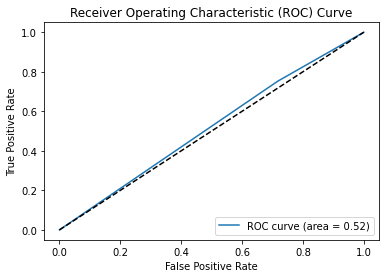

In [81]:
roc_auc_log = roc_auc_score(y_test, y_pred_knn)
print("ROC-AUC Score:", roc_auc_log)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_knn)

# Calculate the area under the ROC curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line representing random guessing
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

## SVM ( DESTEK VEKTÖR MAKİNELERİ ) ALGORİTMASI ##

In [44]:
from sklearn.svm import SVC

In [123]:
#SVM
svm = SVC()
svm.fit(X_train, y_train)
svm.score(X_train, y_train)

0.7788149012417701

In [124]:
y_pred_svm = svm.predict(X_test)

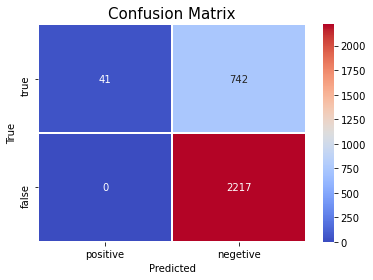

Precision: 0.749 
Recall: 1.0 
F1-Score: 0.857 
Accuracy: 75.267 %
Mean Square Error: 0.247
None


In [125]:
#SVM BAŞARI METRİĞİ yukarıdaki aynı tablo
classify_eval = compute(y_test,svm.predict(X_test))
print(classify_eval)

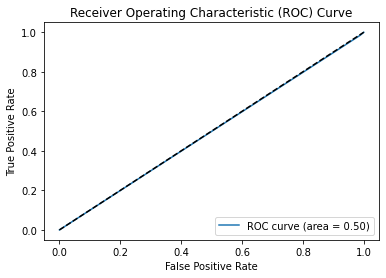

In [70]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_svm)

# Calculate the area under the ROC curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line representing random guessing
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

## RASSAL ORMANLAR ALGORİTMASI ##

In [66]:
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)


DecisionTreeClassifier()

In [67]:
# Test veri seti üzerinde tahmin yapma
y_pred_forest = tree_model.predict(X_test)

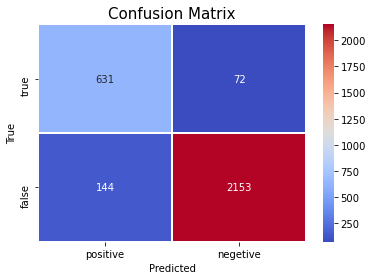

Precision: 0.968 
Recall: 0.937 
F1-Score: 0.952 
Accuracy: 92.8 %
Mean Square Error: 0.072
None


In [50]:
#RASSAL ORMANLAR BAŞARI METRİĞİ  yukarıdaki aynı tablo 
classify_eval = compute(y_test,tree_model.predict(X_test))
print(classify_eval)

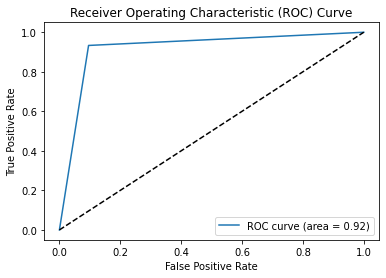

In [69]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_forest)

# Calculate the area under the ROC curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line representing random guessing
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

## TÜM KURULAN MODELLERİN KARŞILAŞTIRILMASI ##